# 0. pima
- 정형데이터에 딥러닝 실습해보기

### 데이터셋 출처
- Pima Indians Diabetes Database | Kaggle
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


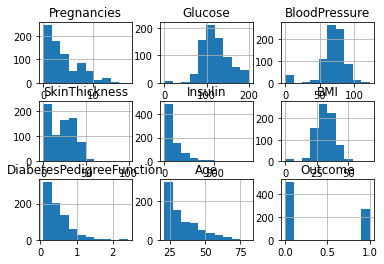

In [4]:
df.hist();

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#1.  데이터 전처리
- Insulin이 0인 값을 당뇨병 여부에 따라 groupby로 인슐린의 평균으로 대체

In [6]:
df.loc[df["Insulin"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
Insulin_mean = df["Insulin"].groupby(df["Outcome"]).describe()["mean"]
Insulin_mean

Outcome
0     68.792000
1    100.335821
Name: mean, dtype: float64

In [8]:
df.loc[(df["Insulin"]==0) & (df["Outcome"]==0), "Insulin"] = Insulin_mean[0]
df.loc[(df["Insulin"]==0) & (df["Outcome"]==1), "Insulin"] = Insulin_mean[1]

In [9]:
df.loc[df["Insulin"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


# 2. 딥러닝

In [10]:
import tensorflow as tf

## 데이터셋 나누기

In [11]:
label_name = "Outcome"
label_name

'Outcome'

In [12]:
X = df.drop(columns=label_name)
y = df[label_name]
X.shape, y.shape

((768, 8), (768,))

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

## 활성화 함수(activations)

In [13]:
dir(tf.keras.activations)[10:]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [14]:
x = np.arange(-10, 10, 0.1) 

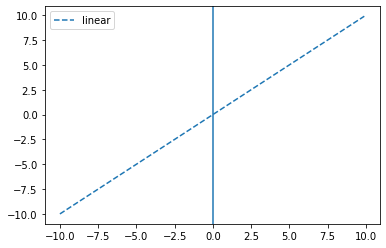

In [15]:
plt.plot(x, tf.keras.activations.linear(x), linestyle='--', label="linear")
plt.axvline(0)
plt.legend()

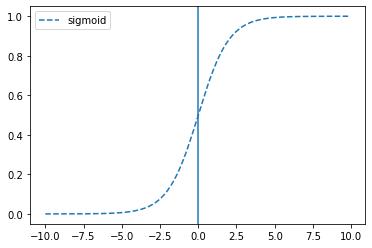

In [16]:
# sigmoid
plt.plot(x, tf.keras.activations.sigmoid(x), linestyle='--', label="sigmoid")
plt.axvline(0)
plt.legend()

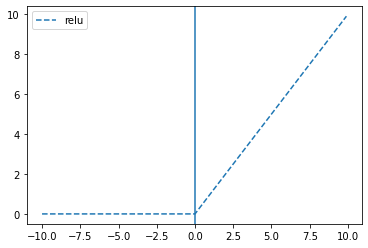

In [17]:
# relu

plt.plot(x, tf.keras.activations.relu(x), linestyle='--', label="relu")
plt.axvline(0)
plt.legend()

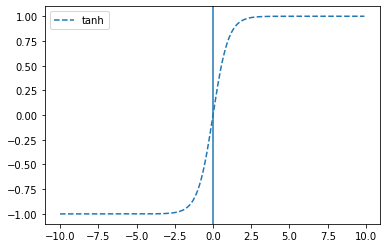

In [18]:
# tanh

plt.plot(x, tf.keras.activations.tanh(x), linestyle='--', label="tanh")
plt.axvline(0)
plt.legend()

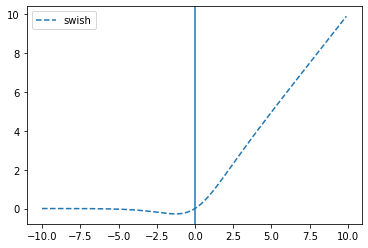

In [19]:
# swish

plt.plot(x, tf.keras.activations.swish(x), linestyle='--', label="swish")
plt.axvline(0)
plt.legend()

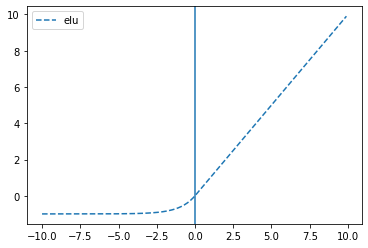

In [20]:
plt.plot(x, tf.keras.activations.elu(x), linestyle='--', label="elu")
plt.axvline(0)
plt.legend()

## 딥러닝 레이어 만들기

In [22]:
input_shape = X.shape[1]
input_shape

8

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, input_shape=[input_shape]),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## 모델 컴파일

In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


## 학습

In [27]:
# val_loss 기준으로 값이 나아지지 않으면 멈추개 합니다.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [28]:
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2,
                    callbacks=[early_stop], verbose=0)

In [29]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
122,0.428890,0.792261,0.497657,0.764228
123,0.414016,0.806517,0.510377,0.764228
124,0.402449,0.812627,0.460762,0.788618
125,0.420191,0.820774,0.492265,0.813008
126,0.421060,0.804481,0.427525,0.829268


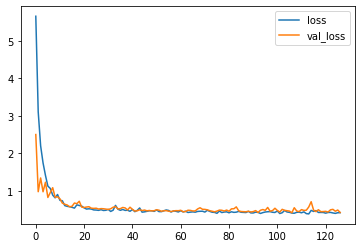

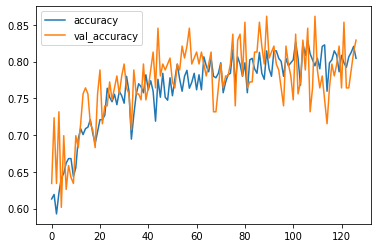

In [30]:
# loss, accuracy 값 시각화 
df_hist[["loss", "val_loss"]].plot()
df_hist[["accuracy", "val_accuracy"]].plot()

## 예측

In [31]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


(154, 1)

In [36]:
y_pred[0:5]

array([[1.9023029e-02],
       [3.3568900e-05],
       [2.5300851e-01],
       [9.0785682e-01],
       [2.9399413e-01]], dtype=float32)

In [37]:
y_predict = (y_pred.flatten() > 0.5).astype(int)

In [38]:
y_predict[0:5]

array([0, 0, 0, 1, 0])

## 평가

In [39]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, test_acc

5/5 [==============================] - 0s 5ms/step - loss: 0.4429 - accuracy: 0.8117


(0.44289055466651917, 0.8116883039474487)

In [40]:
(y_test == y_predict).mean()

0.8116883116883117